In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.patches as patches
from basics import *
from nn_config import *
from enc_dec import *

from prettytable import PrettyTable
import textwrap

import scipy.io.wavfile
from IPython.display import Audio
from IPython.display import display

import time

from IPython.display import HTML
from matplotlib import animation

%matplotlib inline

fisher + callhome sp/es - en configuration
--------------------------------------------------
loading info_dict from=./both_fbank_out/info.dict


 31%|███       | 43054/138708 [00:00<00:00, 430532.20it/s]

--------------------------------------------------
creating buckets for: fisher_dev
creating buckets for key: sp
creating buckets for: fisher_dev2
creating buckets for key: sp
creating buckets for: fisher_test
creating buckets for key: sp
creating buckets for: fisher_train
creating buckets for key: sp


100%|██████████| 14284/14284 [00:00<00:00, 418978.69it/s]


creating buckets for: callhome_devtest
creating buckets for key: sp
creating buckets for: callhome_evltest
creating buckets for key: sp
creating buckets for: callhome_train
creating buckets for key: sp
--------------------------------------------------
saving info dict in: ./both_fbank_out/buckets_sp.dict
all done ...
--------------------------------------------------
showing buckets for category: fisher_dev
number of buckets=15, width of each bucket=150
index | width | num   
    0 |     0 |   1039
    1 |   150 |   1006
    2 |   300 |    614
    3 |   450 |    400
    4 |   600 |    315
    5 |   750 |    246
    6 |   900 |    159
    7 |  1050 |    113
    8 |  1200 |     49
    9 |  1350 |     27
   10 |  1500 |      6
   11 |  1650 |      1
   12 |  1800 |      2
   13 |  1950 |      0
   14 |  2100 |      0
--------------------------------------------------
showing buckets for category: fisher_dev2
number of buckets=15, width of each bucket=150
index | width | num   
    0 |   

In [2]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [3]:
key='fisher_dev'
train=False
m_dict = map_dict[key]
v_dict = vocab_dict[dec_key]
n=len(map_dict[key])
BATCH_SIZE = 512

info_dict_path = os.path.join(out_path,'info.dict')
info_dict = pickle.load(open(info_dict_path, "rb"))
cat_speech_path = os.path.join(out_path, key)

cat_utts = [os.path.splitext(os.path.basename(f))[0] for f in os.listdir(cat_speech_path)]
print("number of utterances = {0:d}".format(len(cat_utts)))

number of utterances = 3977


In [4]:
def play_utt(utt, plot=False):
    sr, y = scipy.io.wavfile.read(os.path.join(wavs_path, utt.rsplit("-",1)[0]+'.wav'))
    start_t = min(seg['start'] for seg in m_dict[utt]['seg'])
    end_t = max(seg['end'] for seg in m_dict[utt]['seg'])
    start_t_samples, end_t_samples = int(start_t*sr), int(end_t*sr)
    display(Audio(y[start_t_samples:end_t_samples], rate=sr))
    if plot:
        fig, ax = plt.subplots(figsize=(15,5),nrows=1, ncols=1)
        ax.plot(y)
        ax.set(xlim=(0, len(y)))
        fig.tight_layout()
        for label in ax.get_yticklabels() + ax.get_xticklabels():
            label.set_visible(False)

In [5]:
def draw_patch(ax):    
    for p in [
                patches.Rectangle(
                    (0.03, 0.1), 0.2, 0.6,
                    alpha=None,
                ),
                patches.Rectangle(
                    (0.26, 0.1), 0.2, 0.6,
                    alpha=1.0
                ),
                patches.Rectangle(
                    (0.49, 0.1), 0.2, 0.6,
                    alpha=0.6
                ),
                patches.Rectangle(
                    (0.72, 0.1), 0.2, 0.6,
                    alpha=0.9,
                    facecolor=tableau20[5]
                ),
        ]:
            ax.add_patch(p)


In [6]:
def plot_utt(utt):
    
    fig, ax = plt.subplots(figsize=(20,5),nrows=1, ncols=1)
    
    utt_sp_path = os.path.join(cat_speech_path, "{0:s}.npy".format(utt))
    wav_data = np.load(utt_sp_path)
    
#     fig, ax = plt.subplots(figsize=(20,5))
    sns.set_style("darkgrid")
    
    #plt.imshow(wav_data.T, )
    cmap = sns.diverging_palette(10, 220, sep=80, n=7, as_cmap=True)
    ax = sns.heatmap(wav_data.T, ax=ax, cmap=cmap, 
                     yticklabels=range(1,wav_data.shape[1]+1), 
                     xticklabels=range(1,wav_data.shape[0]+1))
    ax.grid(False)
    ax.invert_yaxis()
    
    plt.yticks(rotation=0, size=14)
    plt.xticks(rotation=90, size=14)
    
    for label in ax.get_yticklabels() + ax.get_xticklabels():
        label.set_visible(False)
        
    for label in ax.get_yticklabels()[4::5] + ax.get_xticklabels()[9::10]:
        label.set_visible(True)
    
    ax.get_yticklabels()[-1].set_visible(True)
    ax.get_xticklabels()[-1].set_visible(True)
    
    sns.despine(left=True, bottom=True)
    # plt.colorbar()
    
    es = " ".join([w.decode() for w in m_dict[utt]['es_w']])
    en = " ".join([w.decode() for w in m_dict[utt]['en_w'][0]])

    display_pp = PrettyTable(["cat","sent"], hrules=True)
    display_pp.align = "l"
    display_pp.header = False
    display_pp.add_row(["es ref", textwrap.fill(es,50)])
    display_pp.add_row(["en ref", textwrap.fill(en,50)])
    
    print(display_pp)
    
    draw_patch(ax)
    
    fig.tight_layout()

In [7]:
utt_to_view = cat_utts[3]

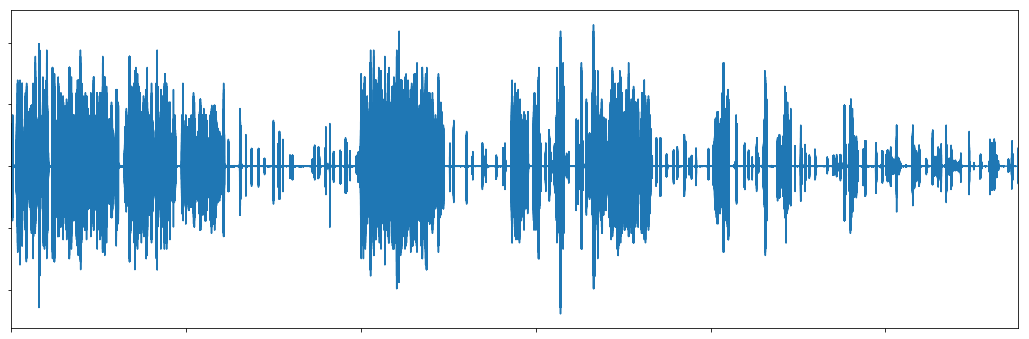

In [8]:
play_utt(utt_to_view, plot=True)

+--------+-------------------------+
| es ref | oh mi nombre es ricardo |
+--------+-------------------------+
| en ref | oh my name is ricardo   |
+--------+-------------------------+


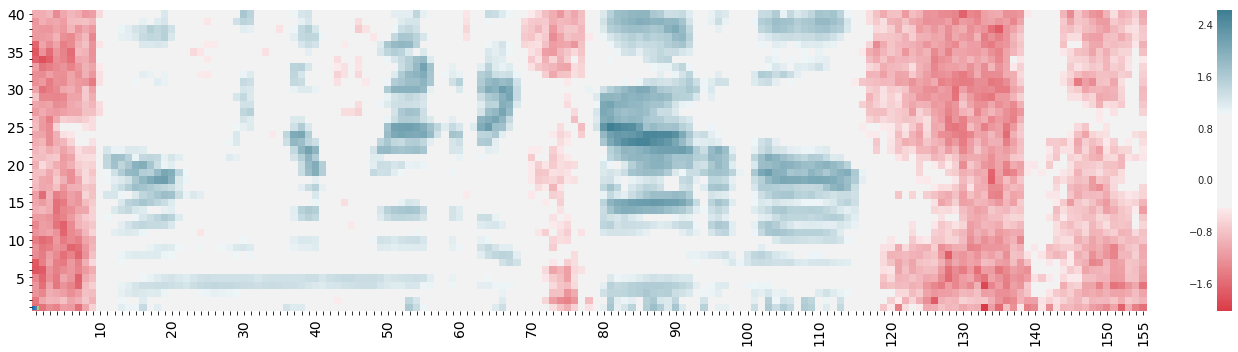

In [9]:
plot_utt(utt_to_view)

+--------+-------------------------+
| es ref | oh mi nombre es ricardo |
+--------+-------------------------+
| en ref | oh my name is ricardo   |
+--------+-------------------------+


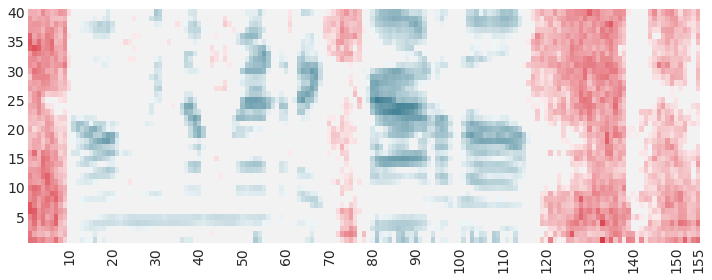

In [42]:
utt = utt_to_view
fig, ax = plt.subplots(figsize=(10,4),nrows=1, ncols=1)

sns.set_style("darkgrid")

utt_sp_path = os.path.join(cat_speech_path, "{0:s}.npy".format(utt))
wav_data = np.load(utt_sp_path)

#plt.imshow(wav_data.T, )
cmap = sns.diverging_palette(10, 220, sep=80, n=7, as_cmap=True)
ax = sns.heatmap(wav_data.T, ax=ax, cmap=cmap, 
                 yticklabels=range(1,wav_data.shape[1]+1), 
                 xticklabels=range(1,wav_data.shape[0]+1),
                 cbar=False)
ax.grid(False)
ax.invert_yaxis()

plt.yticks(rotation=0, size=14)
plt.xticks(rotation=90, size=14)

for label in ax.get_yticklabels() + ax.get_xticklabels():
    label.set_visible(False)

for label in ax.get_yticklabels()[4::5] + ax.get_xticklabels()[9::10]:
    label.set_visible(True)

ax.get_yticklabels()[-1].set_visible(True)
ax.get_xticklabels()[-1].set_visible(True)

sns.despine(left=True, bottom=True)
# plt.colorbar()

es = " ".join([w.decode() for w in m_dict[utt]['es_w']])
en = " ".join([w.decode() for w in m_dict[utt]['en_w'][0]])

display_pp = PrettyTable(["cat","sent"], hrules=True)
display_pp.align = "l"
display_pp.header = False
display_pp.add_row(["es ref", textwrap.fill(es,50)])
display_pp.add_row(["en ref", textwrap.fill(en,50)])

print(display_pp)

x1, x2 = map(int, ax.get_xlim())
y1, y2 = map(int, ax.get_ylim())

px_vals = np.arange(x1+1,x2-3,3)
py_vals = np.arange(y1+1,y2-3,3)[::-1]

p_vals = []

for py in range(y2-3, y1-3,-3):
    for px in range(x1+1,x2-3,3):
        p_vals.append((px, py))

p_vals = np.array(p_vals)

fig.tight_layout()

patch_x = patches.Rectangle((x1, y2-3), 3, 3, alpha=0.5, facecolor='darkgreen', hatch='\\')
patch_y = patches.Rectangle((x1, y2-3), 3, 3, alpha=0.9, facecolor='azure')

# def init():
#     ax.add_patch(patch_x)
#     #ax.add_patch(patch_y)
#     return patch_x,

# def animate(i):
# #     for i, j in zip(px_vals)
# #     if i < len(px_vals):
# #         patch_x.set_xy([px_vals[i], y2-3])
# #     else:
# #         patch_x.set_xy([x1, py_vals[i-len(px_vals)]])
# #     return patch_x,
#     patch_x.set_xy(p_vals[i])
#     return patch_x,

# anim = animation.FuncAnimation(fig, animate,
#                                init_func=init,
#                                frames=len(p_vals),
#                                interval=100,
#                                blit=True)

In [11]:
HTML(anim.to_html5_video())

In [12]:
# anim.save('utt.gif', dpi=80, writer='imagemagick')

In [13]:
wav_data.shape

(155, 40)

In [14]:
from nmt_run import *

cnn_out_dim = rnn_in_units =  320


/afs/inf.ed.ac.uk/group/project/lowres/work/anaconda3/envs/chainer3/lib/python3.6/site-packages/chainer/utils/experimental.py:104: FutureWarning: chainer.links.normalization.layer_normalization.py is experimental. The interface can change in the future.
  FutureWarning)


using ADAM optimizer


In [15]:
batch_data = get_batch(m_dict, enc_key, dec_key, [utt_to_view], vocab_dict, len(wav_data), MAX_EN_LEN, cat_speech_path)

In [16]:
h = batch_data['X']
if CNN_TYPE == DEEP_2D_CNN:
    h = F.expand_dims(h, 2)
            # h = F.reshape(h, (h.shape[:2] + tuple([-1,SPEECH_DIM // 3])))
h = F.swapaxes(h,1,2)

hidden_states = []
print(h.shape)
for i, cnn_layer in enumerate(model.cnns):
    h = model[cnn_layer](h)
    # h = F.max_pooling_nd(h, ksize=cnn_max_pool[i],
    #                      stride=cnn_max_pool[i],
    #                      pad=max_pool_pad)
    # batch normalization before non-linearity
    print(h.shape)
    if USE_BN:
        bn_lname = '{0:s}_bn'.format(cnn_layer)
        h = model[bn_lname](h)
    h = F.relu(h)
    t = np.swapaxes(h.data,1,2)
    t = np.rollaxis(t,2)
    #t = F.reshape(t, t.shape[:2] + tuple([-1]))
    print("t", t.shape)
    hidden_states.append(np.squeeze(xp.asnumpy(t)))


(1, 1, 155, 40)
(1, 32, 52, 20)
t (32, 1, 52, 20)
(1, 32, 18, 10)
t (32, 1, 18, 10)


In [17]:
h = hidden_states[0][0]

In [18]:
h.shape, 155 // 9

((52, 20), 17)

In [19]:
hidden_states[0][0].shape

(52, 20)

In [20]:
type(h)

numpy.ndarray

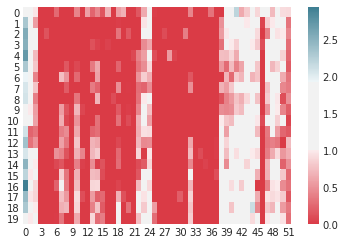

In [21]:
sns.heatmap(h.T, cmap=cmap)

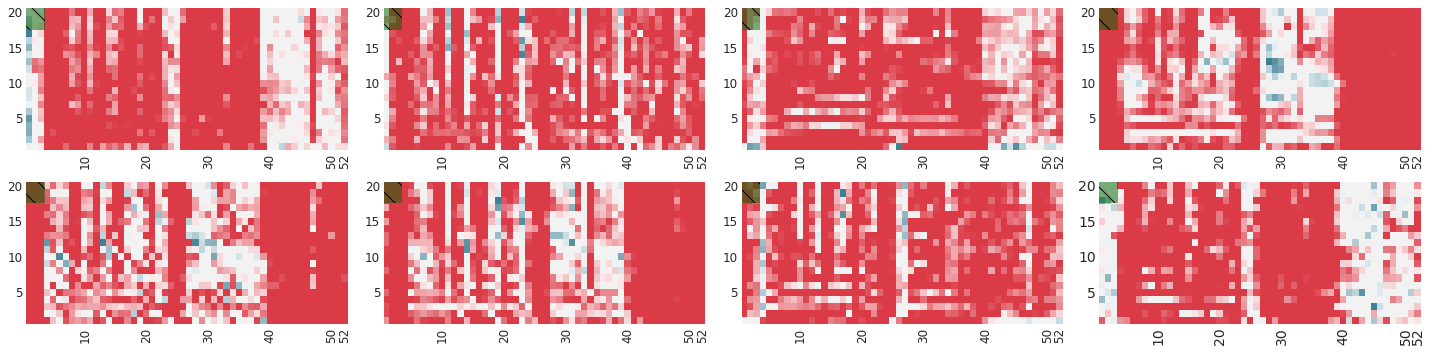

In [22]:
data = hidden_states[0][0]
fig, ax = plt.subplots(figsize=(20,5), nrows=2, ncols=4, sharex=True, sharey=True)

sns.set_style("darkgrid")

#plt.imshow(wav_data.T, )
cmap = sns.diverging_palette(10, 220, sep=80, n=7, as_cmap=True)

for i, h in enumerate(hidden_states[0][:8]):
    ax_i = ax[i//4, (i%4)]
    ax_i = sns.heatmap(h.T, ax=ax_i, cmap=cmap, 
                                 yticklabels=range(1,data.shape[1]+1), 
                                 xticklabels=range(1,data.shape[0]+1),
                                 cbar=False)
    ax_i.grid(False)
    ax_i.invert_yaxis()
    
    
    for label in ax_i.get_yticklabels() + ax_i.get_xticklabels():
        label.set_visible(False)

    for label in ax_i.get_yticklabels()[4::5] + ax_i.get_xticklabels()[9::10]:
        label.set_visible(True)
        label.set_fontsize(12)

    ax_i.get_yticklabels()[-1].set_visible(True)
    ax_i.get_yticklabels()[-1].set_fontsize(12)
    ax_i.get_xticklabels()[-1].set_visible(True)
    ax_i.get_xticklabels()[-1].set_fontsize(12)


plt.yticks(rotation=0, size=14)
plt.xticks(rotation=90, size=14)


sns.despine(left=True, bottom=True)

x1, x2 = map(int, ax[0,0].get_xlim())
y1, y2 = map(int, ax[0,0].get_ylim())

p_vals = []

for py in range(y2-3, y1-3,-3):
    for px in range(x1+1,x2-3,3):
        p_vals.append((px, py))

p_vals = np.array(p_vals)

fig.tight_layout()

me_patches = []
for i, h in enumerate(hidden_states[0][:8]):
    ax_i = ax[i//4, (i%4)]
    patch_x = patches.Rectangle((x1, y2-3), 3, 3, alpha=0.5, facecolor='darkgreen', hatch='\\')
    me_patches.append(patch_x)

def init():
    for i in range(len(me_patches)):
        ax_i = ax[i//4, (i%4)]
        ax_i.add_patch(me_patches[i])
    return me_patches

def animate(i):
    for pi in range(len(me_patches)):
        me_patches[pi].set_xy(p_vals[i])
    return me_patches

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=len(p_vals),
                               interval=100,
                               blit=True)

In [23]:
HTML(anim.to_html5_video())

In [24]:
# anim.save('h1.gif', dpi=80, writer='imagemagick')

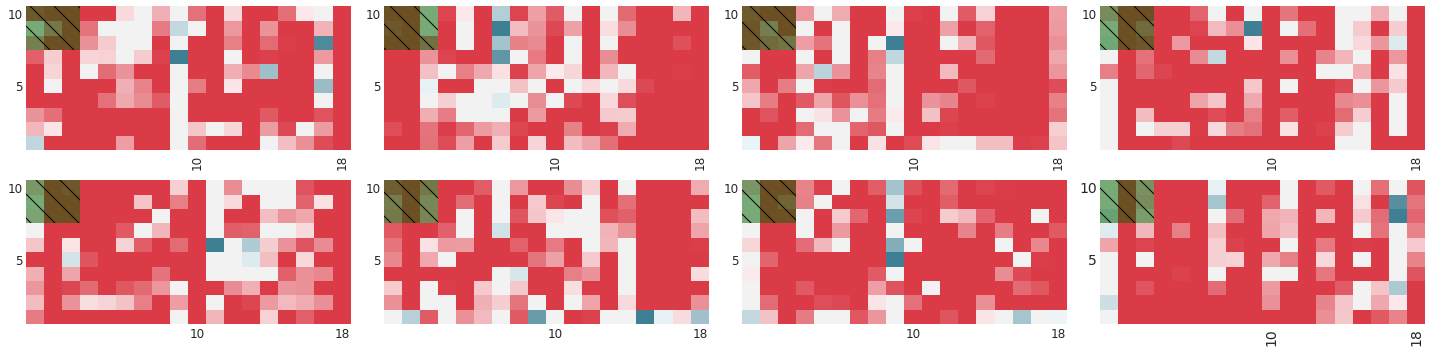

In [40]:
fig, ax = plt.subplots(figsize=(20,5), nrows=2, ncols=4, sharex=True, sharey=True)

sns.set_style("darkgrid")

#plt.imshow(wav_data.T, )
cmap = sns.diverging_palette(10, 220, sep=80, n=7, as_cmap=True)

for i, h in enumerate(hidden_states[1][:8]):
    ax_i = ax[i//4, (i%4)]
    ax_i = sns.heatmap(h.T, ax=ax_i, cmap=cmap, 
                                 yticklabels=range(1,h.shape[1]+1), 
                                 xticklabels=range(1,h.shape[0]+1),
                                 cbar=False)
    ax_i.grid(False)
    ax_i.invert_yaxis()
    
    
    for label in ax_i.get_yticklabels() + ax_i.get_xticklabels():
        label.set_visible(False)

    for label in ax_i.get_yticklabels()[4::5] + ax_i.get_xticklabels()[9::10]:
        label.set_visible(True)
        label.set_fontsize(12)

    ax_i.get_yticklabels()[-1].set_visible(True)
    ax_i.get_yticklabels()[-1].set_fontsize(12)
    ax_i.get_xticklabels()[-1].set_visible(True)
    ax_i.get_xticklabels()[-1].set_fontsize(12)


plt.yticks(rotation=0, size=14)
plt.xticks(rotation=90, size=14)


sns.despine(left=True, bottom=True)

x1, x2 = map(int, ax[0,0].get_xlim())
y1, y2 = map(int, ax[0,0].get_ylim())

p_vals = []

for py in range(y2-3, y1-3,-3):
    for px in range(x1,x2-2,3):
        p_vals.append((px, py))

p_vals = np.array(p_vals)

fig.tight_layout()

me_patches = []
for i, h in enumerate(hidden_states[0][:8]):
    ax_i = ax[i//4, (i%4)]
    patch_x = patches.Rectangle((x1, y2-3), 3, 3, alpha=0.5, facecolor='darkgreen', hatch='\\')
    me_patches.append(patch_x)

def init():
    for i in range(len(me_patches)):
        ax_i = ax[i//4, (i%4)]
        ax_i.add_patch(me_patches[i])
    return me_patches

def animate(i):
    for pi in range(len(me_patches)):
        me_patches[pi].set_xy(p_vals[i])
    return me_patches

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=len(p_vals),
                               interval=100,
                               blit=True)

In [41]:
HTML(anim.to_html5_video())

In [169]:
h = np.rollaxis(hidden_states[1],1)
rnn_input = np.reshape(h, h.shape[:1] + tuple([-1]))

In [170]:
rnn_input.shape

(18, 320)

In [171]:
# rnn_input = np.ones((50,1))

0.0 1.0
0.0 1.0


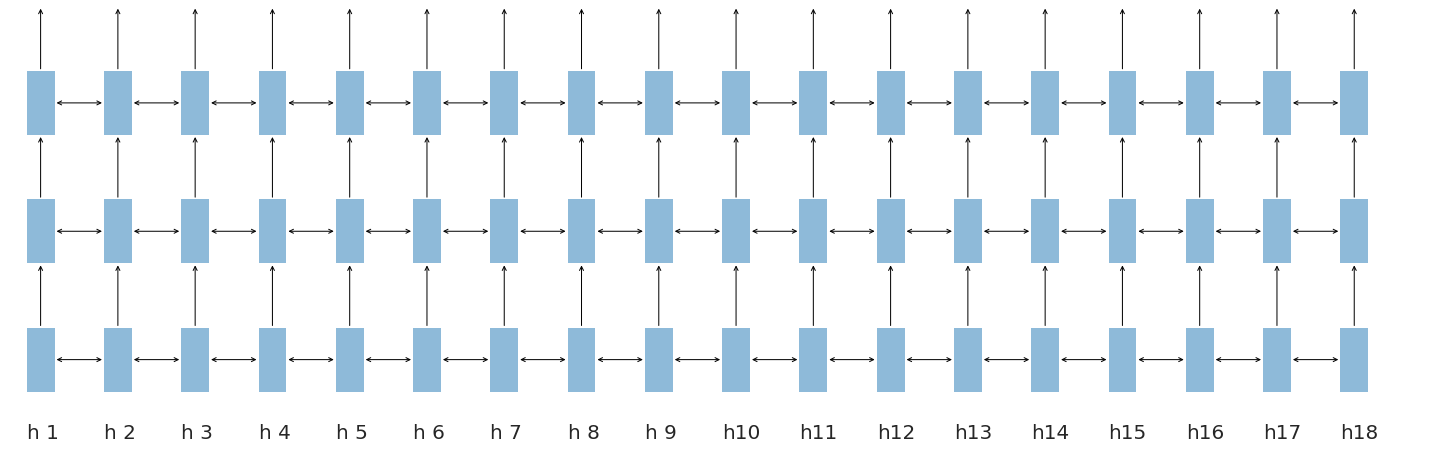

In [174]:
fig, ax = plt.subplots(figsize=(20,5),nrows=1, ncols=1)

me_patches = []

ax.set_ylim = ([0.0,2.0])
x1,x2 = ax.get_xlim()
y1,y2 = ax.get_ylim()

# these are matplotlib.patch.Patch properties
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

print(x1,x2)
print(y1,y2)

block_w = 0.02
block_h = 0.20
# layer 1
for i in range(len(rnn_input)):
    w = ((x2-x1)/len(rnn_input))
    xi, yi = i*w, y1
    p = patches.Rectangle((xi,yi), block_w, block_h, alpha=0.5, facecolor=tableau20[0])
    ax.add_patch(p)

for i in range(len(rnn_input)-1):
    w = ((x2-x1)/len(rnn_input))
    xi, yi = i*w, y1
    ax.annotate('', xy=(xi+block_w,yi+block_h/2), xytext=(xi+w,yi+block_h/2), arrowprops={'arrowstyle': '<->'}, va='center')
    
for i in range(len(rnn_input)):
    w = ((x2-x1)/len(rnn_input))
    xi, yi = i*w, y1
    ax.annotate('', xy=(xi+block_w/2,yi+block_h), xytext=(xi+block_w/2,yi+2*block_h), arrowprops={'arrowstyle': '<-'}, va='center')

# layer 2
for i in range(len(rnn_input)):
    w = ((x2-x1)/len(rnn_input))
    xi, yi = i*w, y1+.4
    p = patches.Rectangle((xi,yi), block_w, block_h, alpha=0.5, facecolor=tableau20[0])
    ax.add_patch(p)

for i in range(len(rnn_input)-1):
    w = ((x2-x1)/len(rnn_input))
    xi, yi = i*w, y1+.4
    ax.annotate('', xy=(xi+block_w,yi+block_h/2), xytext=(xi+w,yi+block_h/2), arrowprops={'arrowstyle': '<->'}, va='center')
    
for i in range(len(rnn_input)):
    w = ((x2-x1)/len(rnn_input))
    xi, yi = i*w, y1+.4
    ax.annotate('', xy=(xi+block_w/2,yi+block_h), xytext=(xi+block_w/2,yi+2*block_h), arrowprops={'arrowstyle': '<-'}, va='center')
    
# layer 3
for i in range(len(rnn_input)):
    w = ((x2-x1)/len(rnn_input))
    xi, yi = i*w, y1+.8
    p = patches.Rectangle((xi,yi), block_w, block_h, alpha=0.5, facecolor=tableau20[0])
    ax.add_patch(p)

for i in range(len(rnn_input)-1):
    w = ((x2-x1)/len(rnn_input))
    xi, yi = i*w, y1+.8
    ax.annotate('', xy=(xi+block_w,yi+block_h/2), xytext=(xi+w,yi+block_h/2), arrowprops={'arrowstyle': '<->'}, va='center')
    
for i in range(len(rnn_input)):
    w = ((x2-x1)/len(rnn_input))
    xi, yi = i*w, y1+.8
    ax.annotate('', xy=(xi+block_w/2,yi+block_h), xytext=(xi+block_w/2,yi+2*block_h), arrowprops={'arrowstyle': '<-'}, va='center')
    
for i in range(len(rnn_input)):
    w = ((x2-x1)/len(rnn_input))
    xi, yi = i*w, y1
    ax.text(xi, y1-.1, "h{0:2d}".format(i+1), transform=ax.transAxes, fontsize=20, verticalalignment='top', rotation=0)
ax.set_axis_off()
fig.tight_layout()

In [83]:
(x2-x1)/len(rnn_input)

0.055555555555555552